## Printing Top - N recommended products based on the similarity matrix calculated previously.

In [14]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import seaborn as sns
import urllib.request as request
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

In [15]:
# Initial DataFrame
similarity_matrix = pd.read_json("Multi_modal_similarity.json")
df = pd.read_csv("C:\Users\nishi\OneDrive\Desktop\CP-01\Dataset_with_img_embeddings.json")

C:\Users\prath\AppData\Local\Temp\ipykernel_8088\854027822.py:3: DtypeWarning: Columns (9,12,22,29,30,31,32,34,35,36,38,39,48,51,53,54,55,58,59,61,64,65,66,72,73,74,75,76,77,78,79,80,81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("H:/work_projects/College/RecSys_assignment/pratham/dataset_with_image_embeddings.csv")


In [16]:
similarity_matrix.head(1)

,17048614,16524740,16331376,14709966,11056154,18704418,14046594,14951330,13791594,17048604,...,16804476,16804460,15007890,16225448,16571966,15415116,16470114,16382150,16379664,16379656
0,1.0,0.608377,0.656871,0.604861,0.709818,0.52922,0.727023,0.637951,0.552482,0.6578,...,0.463147,0.448428,0.530452,0.39652,0.595528,0.355775,0.387884,0.382848,0.36132,0.412196


In [17]:
similarity_matrix.shape

(14223, 14223)

### Finding the Similar N products 

In [18]:
image_directory = "C:\Users\nishi\OneDrive\Desktop\CP-01\archive\images"

In [19]:
def find_n_similar(product_idx, n):
    first_product = similarity_matrix.iloc[product_idx]
    top_n_idx = np.argsort(first_product)[-(n+1):][:-1]
    fig, ax = plt.subplots(n+1, figsize=(50, 50))
    image_path = image_directory + '/' + str(int(df.iloc[product_idx]['p_id'])) + '.jpg'
    ax[0].imshow(img.imread(image_path))
    ax[0].set_title('Original Product')
    for idx, i in enumerate(top_n_idx[::-1]):
        image_path = image_directory + '/' + str(int(df.iloc[i]['p_id'])) + '.jpg'
        image = img.imread(image_path)
        ax[idx+1].imshow(image)
        ax[idx+1].set_title(f'Recommendation: {idx+1}')

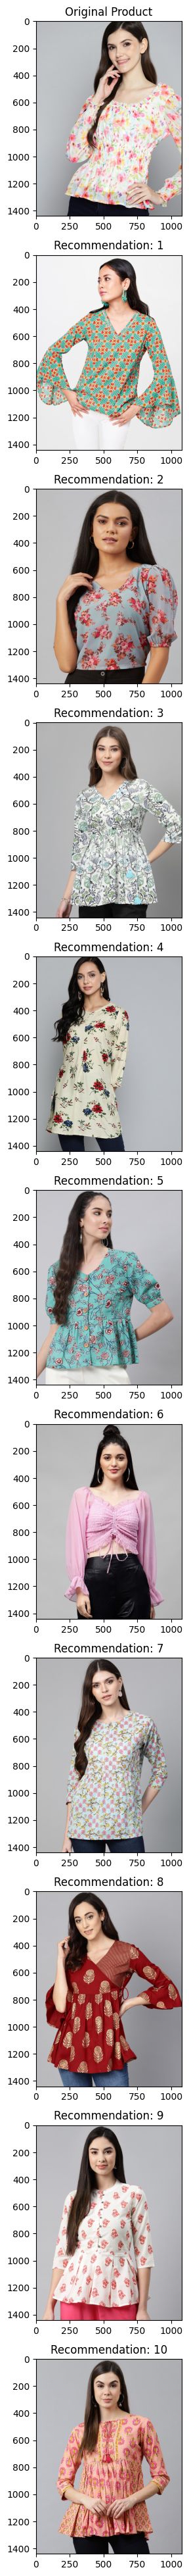

In [20]:
find_n_similar(1001, 10)